In [1]:
## Import different libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.utils import resample


In [2]:
## Reading the data
data = pd.read_csv('thyroid_data.csv')

In [3]:
## Print the first five rows of the data
data


,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2774,82,M,f,f,f,f,f,f,f,...,2.2,t,1,t,68,t,0.77,t,88,sick
3217,2776,79,M,f,f,f,f,f,f,f,...,1.1,t,0.7,t,116,t,0.85,t,137,sick
3218,2782,50,F,f,f,f,f,f,f,f,...,4.8,t,0.6,t,98,t,0.8,t,122,sick
3219,2786,73,?,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173,t,1,t,173,sick


In [4]:
## Shape of the data
data.shape

(3221, 28)

In [5]:
n = len(data[data['Category'] == 'hyperthyroid'])
print("No of hyperthyroid in Dataset:",n)

n1 = len(data[data['Category'] == 'hypothyroid'])
print("No of hypothyroid in Dataset:",n1)

n2 = len(data[data['Category'] == 'sick'])
print("No of sick in Dataset:",n2)

n3 = len(data[data['Category'] == 'negative'])
print("No of negative in Dataset:",n3)

No of hyperthyroid in Dataset: 77
No of hypothyroid in Dataset: 220
No of sick in Dataset: 171
No of negative in Dataset: 2753


##### The data has 3772 rows and 30 columns.

In [6]:
## Columns
data.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [7]:
## Checking the missing values
data.isnull().sum()

S.no                         0
Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

##### We can see that there are no missing values. But if we see the dataset the missing values are replaced with the invalid values like '?'. Let's replace such values with 'nan' and check for the missing values again.

In [8]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

Age 1
Sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


In [9]:
## Let's drop some unnecessary columns
data=data.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured', 
       'FTI Measured'],axis=1)

In [10]:
## Now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [11]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

Age 0
Sex 0
Sick 0
Pregnant 0
Thyroid Surgery 0
Goitre 0
Tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Category 0


##### So, we have replaced all such values with 'nan' values.

In [12]:
##  Unique Values
for column in data.columns:
    print(column,(data[column].unique()))

Age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
Sex ['F' 'M' nan]
Sick ['f' 't']
Pregnant ['f' 't']
Thyroid Surgery ['f' 't']
Goitre ['f' 't']
Tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [13]:
data.dtypes

Age                object
Sex                object
Sick               object
Pregnant           object
Thyroid Surgery    object
Goitre             object
Tumor              object
TSH                object
T3                 object
TT4                object
T4U                object
FTI                object
Category           object
dtype: object

### Handling Missing Values

In [14]:
data['Age'].fillna((data['Age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

### Handling nominal categorical variables

In [15]:
## We will perform one hot encoding for nominal categorical variable.
sex = data[["Sex"]]
sex = pd.get_dummies(sex, drop_first= True)

In [16]:
sick = data[["Sick"]]
sick = pd.get_dummies(sick, drop_first= True)

In [17]:
pregnant = data[["Pregnant"]]
pregnant = pd.get_dummies(pregnant, drop_first= True)

In [18]:
thyroid_surgery = data[["Thyroid Surgery"]]
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)

In [19]:
goitre = data[["Goitre"]]
goitre = pd.get_dummies(goitre, drop_first= True)

In [20]:
tumor = data[["Tumor"]]
tumor = pd.get_dummies(tumor, drop_first= True)

In [21]:
data.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [22]:
final_df = pd.concat([data,sex, sick, pregnant, thyroid_surgery,
       goitre, tumor,], axis = 1)

In [23]:
final_df.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category', 'Sex_M', 'Sick_t',
       'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

In [24]:
final_df.drop(['Sex', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'Goitre', 'Tumor'], axis = 1, inplace = True)

In [25]:
## Checking the missing values
final_df.isnull().sum()

Age                  0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
Category             0
Sex_M                0
Sick_t               0
Pregnant_t           0
Thyroid Surgery_t    0
Goitre_t             0
Tumor_t              0
dtype: int64

##### Great! Now the data has no missing values.

<ipython-input-26-84216db730c1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column])
<ipython-input-26-84216db730c1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column])
<ipython-input-26-84216db730c1>:9: UserWarning: 

`distplot` is a deprecated function and will be 

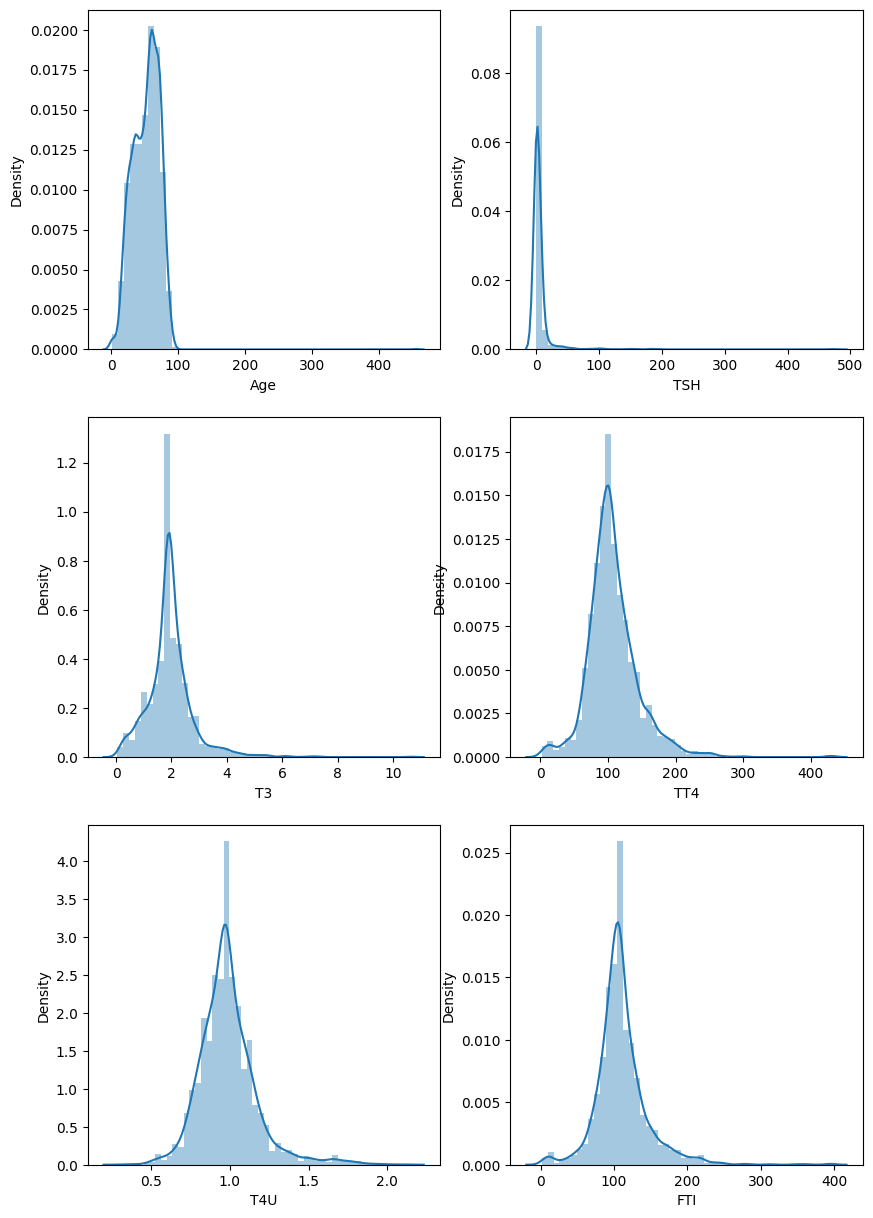

In [26]:
## Let's check the distribution for our continuous data in the dataset.
columns = ['Age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(final_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

##### The graph TSH heavyly skewed towards left. We drop it.

In [27]:
final_df = final_df.drop(['TSH'], axis = 1)

In [28]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
final_df['Category']=lblEn.fit_transform(final_df['Category'])

<Axes: ylabel='count'>

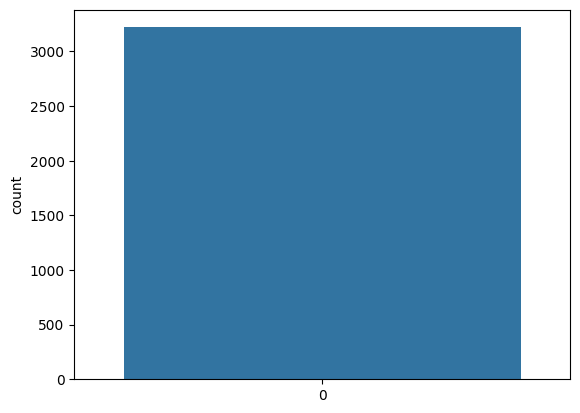

In [29]:
sns.countplot(final_df['Category'])

##### We can see that the dataset is highly imbalanced.


In [30]:
X=final_df.drop(['Category'],axis=1)
y=final_df.Category

Index(['Age', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t', 'Pregnant_t',
       'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

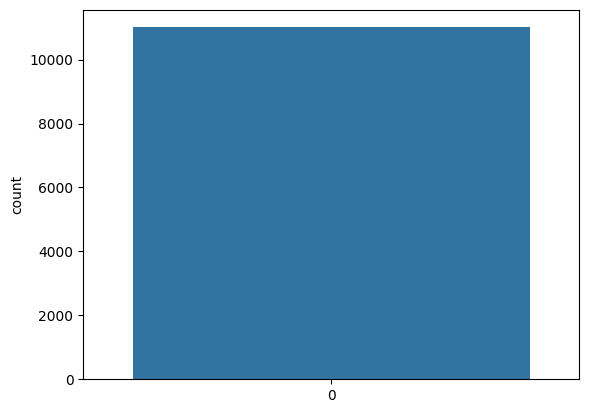

In [31]:
# 42 input

from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
X_sampled,y_sampled=rdsmple.fit_resample(X,y)

X_sampled.shape


X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)


X_sampled


sns.countplot(y_sampled)


X_sampled.columns


##### Great! Our dataset is balanced now.

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=0)

### Fitting data in various models

In [33]:
def svm_classifier(X_train,X_test,y_train,y_test):
    classifier_svm=SVC(kernel='rbf',random_state=0)
    classifier_svm.fit(X_train,y_train)
    y_pred=classifier_svm.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_svm.score(X_train,y_train)}\n Test Score:{classifier_svm.score(X_test,y_test)}')

In [34]:
def knn_classifier(X_train,X_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(X_train,y_train)
    y_pred=classifier_knn.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_knn.score(X_train,y_train)}\n Test Score:{classifier_knn.score(X_test,y_test)}')

In [35]:
def tree_classifier(X_train,X_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier_tree.fit(X_train,y_train)
    y_pred=classifier_tree.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_tree.score(X_train,y_train)}\n Test Score:{classifier_tree.score(X_test,y_test)}')

In [36]:
def forest_classifier(X_train,X_test,y_train,y_test):
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    classifier_forest.fit(X_train,y_train)
    y_pred=classifier_forest.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{classifier_forest.score(X_train,y_train)}\n Test Score:{classifier_forest.score(X_test,y_test)}')

In [37]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    result1=svm_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-"*100)
    print()

    print("KNN:\n")
    result2=knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    result4=tree_classifier(X_train, X_test, y_train, y_test)
    print(result4)

    print("-"*100)
    print()

    print("Random Forest:\n")
    result5=forest_classifier(X_train, X_test, y_train, y_test)
    print(result5)

In [38]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train Score:0.6165285503462368
 Test Score:0.6391284611892873
----------------------------------------------------------------------------------------------------

KNN:

Train Score:0.8651379271199909
 Test Score:0.8483885610531094
----------------------------------------------------------------------------------------------------

Decision Tree:

Train Score:0.9162220456351459
 Test Score:0.8955969133000454
----------------------------------------------------------------------------------------------------

Random Forest:

Train Score:0.9162220456351459
 Test Score:0.9024058102587381


In [39]:
## Performance Metrics
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train,y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[563,   0,   0,   0],
       [  0, 526,   0,  27],
       [ 21,  48, 423,  40],
       [ 52,  29,   0, 474]])

In [40]:
## Classification Report (Accuracy, Precision, Recall and F1 Score)
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       563
           1       0.87      0.95      0.91       553
           2       1.00      0.80      0.89       532
           3       0.88      0.85      0.86       555

    accuracy                           0.90      2203
   macro avg       0.91      0.90      0.90      2203
weighted avg       0.91      0.90      0.90      2203



#### Hyperparameter Tuning

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier_forest, X=X_train,y=y_train,cv=10)
print(accuracies.mean())

0.8971514807553399


In [43]:
import pickle
filename = 'thyroid_model.pkl'
pickle.dump(classifier_forest,open(filename,'wb'))

In [44]:
model = open('thyroid_model.pkl','rb')
forest = pickle.load(model)

In [45]:
y_pred = forest.predict(X_test)

In [46]:
confusion_matrix(y_test, y_pred)

array([[563,   0,   0,   0],
       [  0, 526,   0,  27],
       [ 21,  48, 423,  40],
       [ 52,  29,   0, 474]])

In [47]:
X.columns

Index(['Age', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t', 'Pregnant_t',
       'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t'],
      dtype='object')

In [48]:
print(forest.predict([[41,2.5,125,1.14,109,0,0,0,0,0,0]]))

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
print(forest.predict([[63,5.5,199,1.05,190,0,0,0,0,0,0]]))

[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
print(forest.predict([[44,1.4,39,1.16,33,1,0,0,0,0,0]]))

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [51]:
print(forest.predict([[61,1,96,0.93,109,1,1,0,0,0,0]]))

[3]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
